# Übung 8 - Clusteranalyse

Importiert die Standardpakete.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Lesen Sie die Fortnitedaten ein und schauen sich die ersten Zeilen an.

In [4]:
# CSV Datei einlesen
df = pd.read_csv('08_Fortnitedaten.csv', delimiter=';')
df

,Name,DPS,Damage,Critical %,Crit. Damage,Fire Rate,Mag. Size,Range,Durability,Reload Time,Ammo Cost,Impact,Rarity,Type
0,Scar,198.0,36,0,0,5.50,30,1.000,?,2.1,1,31,Legendary,Assault Rifles
1,Scar,192.5,35,0,0,5.50,30,1.000,?,2.1,1,29,Epic,Assault Rifles
2,Scoped Rifle,84.0,24,0,0,3.50,20,1.000,?,2.2,1,29,Epic,Assault Rifles
3,Scoped Rifle,80.5,23,0,0,3.50,20,1.000,?,2.3,1,28,Rare,Assault Rifles
4,M4,181.5,33,0,0,5.50,30,1.000,?,2.2,1,28,Rare,Assault Rifles
5,M4,170.5,31,0,0,5.50,30,1.000,?,2.2,1,27,Uncommon,Assault Rifles
6,M4,165.0,30,0,0,5.50,30,1.000,?,2.3,1,25,Common,Assault Rifles
7,Burst Rifle,121.9,30,0,0,4.06,30,1.000,?,2.6,1,44,Rare,Assault Rifles
8,Burst Rifle,117.9,29,0,0,4.06,30,1.000,?,2.7,1,42,Uncommon,Assault Rifles
9,Burst Rifle,109.7,27,0,0,4.06,30,1.000,?,2.9,1,40,Common,Assault Rifles


## 8.1 Interpretation der Attribte
- **Name** beschreibt den Namen der Waffe, die in Fortnite verwendet werden kann.
- **DPS** steht für "Damage Per Second" und beschreibt den Schaden, den eine Waffe pro Sekunde verursachen kann an einem gegnerischen Spieler.
- **Damage** entspricht dem Schaden, den die Waffe pro Kugel an einem gegnerischen Spieler verursachen kann.
- **Fire Rate** beschreibt die geschwindigkeit pro Sekunde, in der eine Kugel der Waffe abgefeuert werden kann.
- **Mag. Size** steht für die größe des Magazins einer Waffe, die Anzahl an Kugeln die gefeuert werden können, bevor nachgeladen werden muss.
- **Reload** Time stellt dar, wie lange es dauert, bis die Waffe nachgeladen ist.
- **Impact** beschreibt im "Save The World"-Modus wie sehr eine Waffe ein Monster ins taumeln bringen kann. Im "Battle Royal"-Modus hat der Impact keine Auswirkung.

## 8.2 Auswahl der Attribute
Wählen Sie die Attribute "DPS", "Damage", "Fire Rate", "Mag. Size", "Reload Time", "Impact" für das Clustering. Schauen Sie sich die Datentypen an und nehmen Sie ggf. notwendige Datentransformation vor.

In [5]:
dfCopy = df.copy()
dfCopy.drop(['Name', 'Critical %', 'Crit. Damage', 'Range', 'Durability', 'Ammo Cost', 'Rarity', 'Type'], axis=1, inplace=True)
dfCopy

,DPS,Damage,Fire Rate,Mag. Size,Reload Time,Impact
0,198.0,36,5.50,30,2.1,31
1,192.5,35,5.50,30,2.1,29
2,84.0,24,3.50,20,2.2,29
3,80.5,23,3.50,20,2.3,28
4,181.5,33,5.50,30,2.2,28
5,170.5,31,5.50,30,2.2,27
6,165.0,30,5.50,30,2.3,25
7,121.9,30,4.06,30,2.6,44
8,117.9,29,4.06,30,2.7,42
9,109.7,27,4.06,30,2.9,40


## 8.2 Training & Bewertung der Modelle
Ziel ist es drei Cluster in den Daten zu finden und diese optisch ansprechend darzustellen. Nutzen Sie den kMeans Algorithmus für die Clusteranalyse. Wählen Sie als initiale Cluster die ersten drei Datensätze.


#### A1: k-Means-Algorithmus

In [8]:
from sklearn.cluster import KMeans
import numpy as np
X = dfCopy
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [9]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2],
      dtype=int32)

In [10]:
kmeans.predict(dfCopy.iloc[0:2])

array([0, 0], dtype=int32)

In [11]:
kmeans.cluster_centers_

array([[1.46606897e+02, 3.01379310e+01, 6.46655172e+00, 2.35517241e+01,
        2.13103448e+00, 4.83793103e+01],
       [8.67333333e+01, 1.15666667e+02, 7.50000000e-01, 1.00000000e+00,
        2.20000000e+00, 2.10000000e+03],
       [7.91181818e+01, 9.47272727e+01, 8.99090909e-01, 5.00000000e+00,
        4.03636364e+00, 4.89272727e+02]])

## 8.3 Streudiagramme
Nutzen Sie einen Scatterplot, um die Cluster in jeweils 2 Dimensionen zu visualisieren. Über die Dictionary-Datenstruktur können Farben zugewiesen werden. Testen Sie verschiedene Kombinationen an Merkmalen aus.

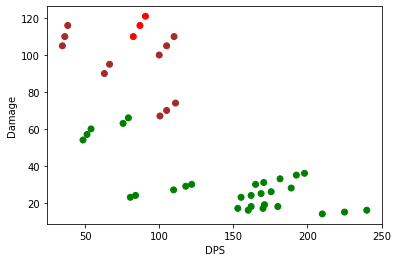

In [13]:
label_color_map = { 0: 'green',
                    1: 'red',
                    2: 'brown'}
label_color = [label_color_map[l] for l in kmeans.labels_]
plt.scatter(dfCopy["DPS"], dfCopy["Damage"], c = label_color)
x = plt.ylabel("Damage")
y = plt.xlabel("DPS")

## 8.4 Silhouetten-Koeffizient


Berechnen Sie den Silhoutten-Koeffizienten des gesamten Clusterings.

In [15]:
import sklearn
sklearn.metrics.silhouette_score(X, kmeans.labels_)

0.7367114262948395

## 8.5 Interpretation der Ergebnisse
Schauen Sie sich die Ergebnisse des Scatterplots an und versuchen Sie fachliche Interpretationen der Ergbnisse zu finden. Was stellen die Cluster dar?

In [17]:
df['Cluster'] = kmeans.labels_
df

,Name,DPS,Damage,Critical %,Crit. Damage,Fire Rate,Mag. Size,Range,Durability,Reload Time,Ammo Cost,Impact,Rarity,Type,Cluster
0,Scar,198.0,36,0,0,5.50,30,1.000,?,2.1,1,31,Legendary,Assault Rifles,0
1,Scar,192.5,35,0,0,5.50,30,1.000,?,2.1,1,29,Epic,Assault Rifles,0
2,Scoped Rifle,84.0,24,0,0,3.50,20,1.000,?,2.2,1,29,Epic,Assault Rifles,0
3,Scoped Rifle,80.5,23,0,0,3.50,20,1.000,?,2.3,1,28,Rare,Assault Rifles,0
4,M4,181.5,33,0,0,5.50,30,1.000,?,2.2,1,28,Rare,Assault Rifles,0
5,M4,170.5,31,0,0,5.50,30,1.000,?,2.2,1,27,Uncommon,Assault Rifles,0
6,M4,165.0,30,0,0,5.50,30,1.000,?,2.3,1,25,Common,Assault Rifles,0
7,Burst Rifle,121.9,30,0,0,4.06,30,1.000,?,2.6,1,44,Rare,Assault Rifles,0
8,Burst Rifle,117.9,29,0,0,4.06,30,1.000,?,2.7,1,42,Uncommon,Assault Rifles,0
9,Burst Rifle,109.7,27,0,0,4.06,30,1.000,?,2.9,1,40,Common,Assault Rifles,0
